In [1]:
# Load libraries
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from bs4 import BeautifulSoup
import pandas as pd
# selenium
from selenium.webdriver.common.by import By
import selenium.webdriver as webdriver
import selenium.webdriver.support.ui as ui
from selenium.webdriver.common.keys import Keys
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
#sys libraries
from time import sleep
import requests
import random
import csv
import io
import os
import sys
import types
import getpass
import string
import re
from bs4 import BeautifulSoup

# Import data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Load library
import matplotlib.patches as mpatches

# nltk and wordcloud
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

%matplotlib inline
plt.style.use('ggplot')

pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows' , 100)

In [ ]:
# Create values Selenium
# COMPANY = input("Enter Company ID: ") 
#Uber = 1815218
# IBM = 1009
# facebook = 10667
COMPANY = "10667"

# USERNAME = input("Enter username: ")
USERNAME = 'behdad.k7@gmail.com'

# PASSWORD = input("Enter password: ")
PASSWORD = '1988behrooz10973'
EMPLOYEE = 1000 #int(raw_input("Enter number of results: "))
linkedin = 'https://www.linkedin.com'

# Open Selenium
browser = webdriver.Firefox(executable_path= "geckodriver.exe")

profile = webdriver.FirefoxProfile()
profile.set_preference("browser.cache.disk.enable", False)
profile.set_preference("browser.cache.memory.enable", False)
profile.set_preference("browser.cache.offline.enable", False)
profile.set_preference("network.http.use-cache", False)
profile.update_preferences()

browser.get(linkedin)
sleep(3)

# Find the sign in botthon
sign_in = browser.find_element(by='link text', value='Sign in')
sign_in.click()
sleep(5)

# We find the input section and enter our user information.
email_entry = browser.find_element(by='css selector', value='#username')
password_entry = browser.find_element(by='css selector', value='#password')

# For every letter in our email, we will set a random time between keystrokes
for letter in USERNAME:
    sleep(random.uniform(.1, .4))
    email_entry.send_keys(letter)

# We expect a random time between 0.1 and 0.4 sec for each letter of our password.
for letter in PASSWORD:
    sleep(random.uniform(.1, .4))
    password_entry.send_keys(letter)

# We press enter
password_entry.send_keys(Keys.RETURN)
sleep(10)

search = "https://www.linkedin.com/search/results/people/?facetCurrentCompany=%5B%22" + str(COMPANY) + "%22%5D"

browser.get(search)
sleep(3)
browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
current_url = 'url_placeholder' # this is a placeholder for the URL check

# Create empty dataframe
df = pd.DataFrame(columns = ['name', 'title', 'location', 'profile'])

# Go through pages and download data
while True:
    # Check to see if url is the 100th page in search
    if current_url.find('page=100') != -1:
        break
    # Check to see if this url has been scraped before; break loop if it has
    previous_url = current_url
    current_url = browser.current_url
    if current_url == previous_url:
        break

    # Start scraping and filling in the dataframe
    page = BeautifulSoup(browser.page_source, 'lxml')
    page_names = page.find_all('span', class_ = 'actor-name')
    page_titles = page.find_all('p', class_ = 'subline-level-1')
    page_locations = page.find_all('p', class_ = 'subline-level-2')
    page_profiles = page.find_all('a', class_ = 'search-result__result-link')

    # Put scraped data into a dataframe
    names = list(map(lambda x: x.text, page_names))
    titles = list(map(lambda x: x.text.replace('\n', ''), page_titles))
    locations = list(map(lambda x: x.text.replace('\n', ''), page_locations))
    profiles = list(map(lambda x: linkedin + x['href'], page_profiles))[::2]
    temp = pd.DataFrame({'name':names, 'title':titles, 'location':locations, 'profile':profiles})

    # Filter out members who do not provide information
    temp = temp[temp['name'] != 'LinkedIn Member']

    # Append new data to df
    df = df.append(temp)

    # Stop appending if the number of retrieved records exceeds the limit
    if df.shape[0] >= EMPLOYEE:
        break

    # Find next button and hit next
    nextt = WebDriverWait(browser, 10).until(
    EC.presence_of_element_located((By.XPATH, "//button[contains(@class,'artdeco-pagination__button artdeco-pagination__button--next artdeco-button artdeco-button--muted artdeco-button--icon-right artdeco-button--1 artdeco-button--tertiary')]")))
    sleep(2)
    nextt.click()
    sleep(2)

# Reset dataframe index
df.reset_index()

# Export results
df.to_csv("output_search.csv", index = False)

# Close Selenium
browser.quit()


In [ ]:
df = pd.read_csv('output_search_Uber.csv',index_col=False)
print(len(df))
df

In [ ]:
username = 'behdad.k7@gmail.com'
password = '1988behrooz10973'
profession = 'data scientist'
comapny_name = 'Uber'

file_name = str.strip(profession) + "_" + str(comapny_name) +'.csv'

In [ ]:
driver = webdriver.Firefox(executable_path= "geckodriver.exe")

profile = webdriver.FirefoxProfile()
profile.set_preference("browser.cache.disk.enable", False)
profile.set_preference("browser.cache.memory.enable", False)
profile.set_preference("browser.cache.offline.enable", False)
profile.set_preference("network.http.use-cache", False)
profile.update_preferences()

driver.get(url='https://www.linkedin.com/')
sleep(2)

# Find the sign in botthon
sign_in = driver.find_element(by='link text', value='Sign in')
sign_in.click()
sleep(5)

# We find the input section and enter our user information.
email_entry = driver.find_element(by='css selector', value='#username')
password_entry = driver.find_element(by='css selector', value='#password')

# For every letter in our email, we will set a random time between keystrokes
for letter in username:
    sleep(random.uniform(.1, .4))
    email_entry.send_keys(letter)

# We expect a random time between 0.1 and 0.4 sec for each letter of our password.
for letter in password:
    sleep(random.uniform(.1, .4))
    password_entry.send_keys(letter)

# We press enter
password_entry.send_keys(Keys.RETURN)
sleep(10)


source = requests.get(driver.current_url).text
soup = BeautifulSoup(source, 'lxml')

# open the csv file to wirte
writer = csv.writer(open(file_name, 'w', encoding='utf-8'))
#write the headers
writer.writerow(['name', 'job_title', 'current_company', 'university','degree',
                 'location', 'about', 'skills','present_url'])

# Function to identify driver
def driving(x):
    if x.lower().find('data') != -1 or x.lower().find('scien') != -1 or x.lower().find('Data') != -1 or x.lower().find('Scien') != -1 or x.lower().find('machine') != -1  or x.lower().find('analyst') != -1:
        return(1)
    else:
        return(0)

    
# Create driver column
df['driver'] = list(map(driving, df['title']))
#Remove value 0
df = df[df.driver != 0]

p_list = df['profile'].tolist()
print(len(p_list))

i =0
for pro in p_list:
    i=i+1
    try:
        driver.get(pro)
        print('--------------------' , i , '---------------------')
        print('scraping ...' , pro , '\n')
        sleep(3)
        driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
        sleep(.75)
        driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
        sleep(.75)
        driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
        sleep(.75)
        driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
        sleep(.75)
        driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
        sleep(2)

        
        page = BeautifulSoup(driver.page_source, 'lxml')
            
        # -------------Scrap here----------------

        ''' 1)Name'''
        try:
            name = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((
                    By.XPATH,'//li[contains(@class, "inline t-24 t-black t-normal break-words")]')))
            name = name.text
            if name:
                name = name.strip()
        except:
            name = np.nan
                
        print('name: ',name , '\n')
        sleep(0.5)
        
        ''' 2)job_title'''
        try:
            job_title = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((
                    By.XPATH,'//h2[contains(@class, "mt1 t-18 t-black t-normal")]')))
            job_title = job_title.text
            if job_title:
                job_title = job_title.strip()
        except:
            job_title = np.nan
                
        print('job_title: ',job_title , '\n')
        sleep(0.5)
        
        ''' 3)current_company'''
        try:
            current_company = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((
                    By.XPATH,'//ul[contains(@class, "pv-top-card--experience-list")]/li[1]')))
            current_company = current_company.text
            if current_company:
                current_company = current_company.strip()
        except:
            current_company = np.nan
                
        print('current_company:  ',current_company , '\n')
        sleep(0.5)
    
        ''' 4)university'''
        try:
            university = WebDriverWait(driver, 15).until(
                EC.presence_of_element_located((
                    By.XPATH,'//ul[contains(@class, "pv-top-card--experience-list")]/li[2]')))
            if university =='':
                degree = WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((
                        By.XPATH,'//section[contains(@class, "pv-profile-section education-section ember-view")]')))
            degree = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((
                    By.XPATH,'//li[1]//div[contains(@class,"pv-entity__degree-info")]')))
            degree = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((
                    By.XPATH,'//h3[contains(@class,"pv-entity__school-name t-16 t-black t-bold")]')))
            
            university = university.text
            if university:
                university = university.strip()
        except:
            university = np.nan
                

        print('university:  ',university , '\n')
        sleep(0.5)
        
        ''' 5)degree'''
        try:
            degree = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((
                    By.XPATH,'//section[contains(@class, "pv-profile-section education-section ember-view")]')))
            degree = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((
                    By.XPATH,'//li[1]//div[contains(@class,"pv-entity__degree-info")]')))
            degree = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((
                    By.XPATH,'//span[contains(@class,"pv-entity__comma-item")]')))
            degree = degree.text
            
            if degree=='':
                degree = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((
                    By.XPATH,'//p[contains(@class,"pv-entity__degree-name")]')))
                degree = degree.text
                
            if degree:
                degree = degree.strip()
        except:
            degree = np.nan
                
        print('degree:  ',degree , '\n')
        sleep(0.5)
        
        ''' 6)location'''
        try:
            location = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((
                    By.XPATH,'//ul[contains(@class, "pv-top-card--list pv-top-card--list-bullet mt1")]/li[1]')))
            location = location.text
            if location:
                location = location.strip()
        except:
            location = np.nan
        
        print('location:  ',location , '\n')
        sleep(0.5)
        
        ''' 7)about'''
        try:
            about = WebDriverWait(driver, 20).until(
                EC.presence_of_element_located((
                    By.XPATH,'//section[contains(@class, "artdeco-container-card pv-profile-section pv-about-section ember-view")]//a[contains(@class,"lt-line-clamp__more")]'))).click()
            about = WebDriverWait(driver, 20).until(
                EC.presence_of_element_located((
                    By.XPATH,'//p[contains(@class,"pv-about__summary-text mt4 t-14 ember-view")]')))      
            about = about.text
            if about:
                about = about.strip()
        except:
            about = np.nan
             
        print('about:\n',about , '\n')
        sleep(0.5)
        
        ''' 8)skills'''
        
        try:      
            print("skills search ... ")
            skills = page.find_all('span', class_ = "pv-skill-category-entity__name-text")
            
            #Put scraped data into a ski_df
            arraylen3 = len(page.find_all('span', class_ = "pv-skill-category-entity__name-text"))
        
            profile = pro
            skills = list(map(lambda x: x.text.strip(), skills))[0:arraylen3]
            skills = ','.join(skill for skill in skills)
        except:
            skills = np.nan
                
        print('skills:  ',skills , '\n')
        sleep(0.5)

        writer.writerow([ name, job_title, current_company, university, degree, location, about
                        ,skills, profile])   
        sleep(2)
        
    except:
        pass

print("The process is completed ...\n closing The program!")
driver.quit()

## Exploratory Data Analysis (EDA)

In [2]:
# Reading from scv file
df = pd.read_csv('data scientist_Uber.csv',index_col=False)
print("Number of records: " ,df.shape[0])
print("Number of columns: " ,df.shape[1])

Number of records:  36
Number of columns:  9


In [3]:
df.columns

Index(['name', 'job_title', 'current_company', 'university', 'degree',
       'location', 'about', 'skills', 'present_url'],
      dtype='object')

In [4]:
# find number of missing data based on each column
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("\n")

name
False    36
Name: name, dtype: int64


job_title
False    36
Name: job_title, dtype: int64


current_company
False    36
Name: current_company, dtype: int64


university
False    34
True      2
Name: university, dtype: int64


degree
False    35
True      1
Name: degree, dtype: int64


location
False    36
Name: location, dtype: int64


about
False    24
True     12
Name: about, dtype: int64


skills
False    32
True      4
Name: skills, dtype: int64


present_url
False    36
Name: present_url, dtype: int64




In [5]:
# let see is there anyone from outside UK in our dataset
df['location'].value_counts().to_frame().reset_index()

index  location
0         San Francisco Bay Area         9
1      San Francisco, California         8
2    Hyderabad, Telangana, India         3
3       Toronto, Ontario, Canada         2
4       Pittsburgh, Pennsylvania         2
5             New York, New York         2
6      Mountain View, California         1
7     Greater New York City Area         1
8   São Paulo, São Paulo, Brazil         1
9                        Ireland         1
10           Oakland, California         1
11     Ahmedabad, Gujarat, India         1
12         Hyderabad Area, India         1
13          Greater Seattle Area         1
14        Santa Cruz, California         1
15          San Jose, California         1

#### working on Education

In [6]:
#Creating column to identify degree earned 
education = df[df['degree'].notnull()]
# Function to identify degree
def degree(x):
    if x.lower().find('master') != -1 or x.lower().find('ms') != -1 or x.lower().find('m.s') != -1 or x.lower().find('mba') != -1:
        return('master')
    if x.lower().find('phd') != -1 or x.lower().find('p.hd') != -1 or x.lower().find('ph.d.') != -1 or x.lower().find('ph.d') != -1:
        return('ph.d.')
    if x.lower().find('bachelor') != -1 or x.lower().find('ba') != -1 or x.lower().find('bs') != -1 or x.lower().find('b.a') != -1 or x.lower().find('b.s') != -1:
        return('bachelor')
    else:
        return('Other')

# Create degree column
education['deg'] = list(map(degree, education['degree']))

education


C:\Users\behdad\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


name  \
0                   Payam Siyari   
1                  Afshine Amidi   
2                  Ehsan Mousavi   
3                  Soheil Ehsani   
4                  Akshay Tiwari   
5                        Ye Wang   
6                Taylor Pellerin   
7                 Shubham Sharma   
8   RahulRaghavendiran Ravikumar   
9              Abhimanyu Rathore   
10                        Wei Xu   
11                      Fei Feng   
12              Mori Ashraphijuo   
13                      Fan Yang   
14                 Nicolas Henry   
15               Xiao Cai, Ph.D.   
16                   Lily Y. Liu   
17               Daniel Chamorro   
18                     Nikhil J.   
19                Priyanka Saboo   
20                  Sai Supreeth   
21       Suman Bhattacharya, PhD   
22                       Zoey C.   
23            Pau Perng-Hwa Kung   
24          Ashirwad Chakraborty   
25                     Alex Chao   
26                   DaoYing Lin   
27              Stathis Ilonidis   
28              Divyansh Agarwal   
29                  Darwin Leung   
31               sivakumar reddy   
32                Nemanja Djuric   
33                    Jason Wien   
34                  Elizaveta G.   
35                 Gaurav Shimpi   

                                                                                              job_title  \
0                                                                         Senior Data Scientist at Uber   
1                                                                                Data Scientist at Uber   
2                                                                      Senior Data Scientist II at Uber   
3                                             PhD in computer science, working on self-driving vehicles   
4                                                                                Data Scientist at Uber   
5                                                        Senior Data Analyst, Tech Lead Manager at Uber   
6                                                                           Data Scientist at Uber Eats   
7                                                         Machine Learning and Deep Learning Enthusiast   
8                                                                         Data Scientist at Uber AdTech   
9                                               Senior Business Analyst, Analytics and Insights at Uber   
10                                                           Data Scientist at Uber, Ph.D. in Economics   
11                                                                             Data Science & Analytics   
12                                                                            Data Scientist II at Uber   
13                                                                      Data Science Manager II at Uber   
14                                                                  Data Scientist, Self-Driving @ Uber   
15                                                              Sr.Machine learning Engineering at Uber   
16                                                                                Data Scientist - Uber   
17                                                     Data Scientist specialized in Big Data Analytics   
18                                                                                       Data Scientist   
19                                                                                  Data Science @ Uber   
20  Uber | Ex-Google |Digital Marketing | Social Media Specialist | Business Development |Growth Hac...   
21                                                                         Data Science Manager at Uber   
22     Global Marketing Data Science & Analytics @UBER | CMUer | Co-Founder @TechMeetsBeauty | BeautyAI   
23                                                       Marketplace Pricing and Machine Learning @Uber   
24                                                      

In [54]:
education['deg'].value_counts(normalize=True) * 100

master      40.000000
ph.d.       34.285714
bachelor    17.142857
Other        8.571429
Name: deg, dtype: float64

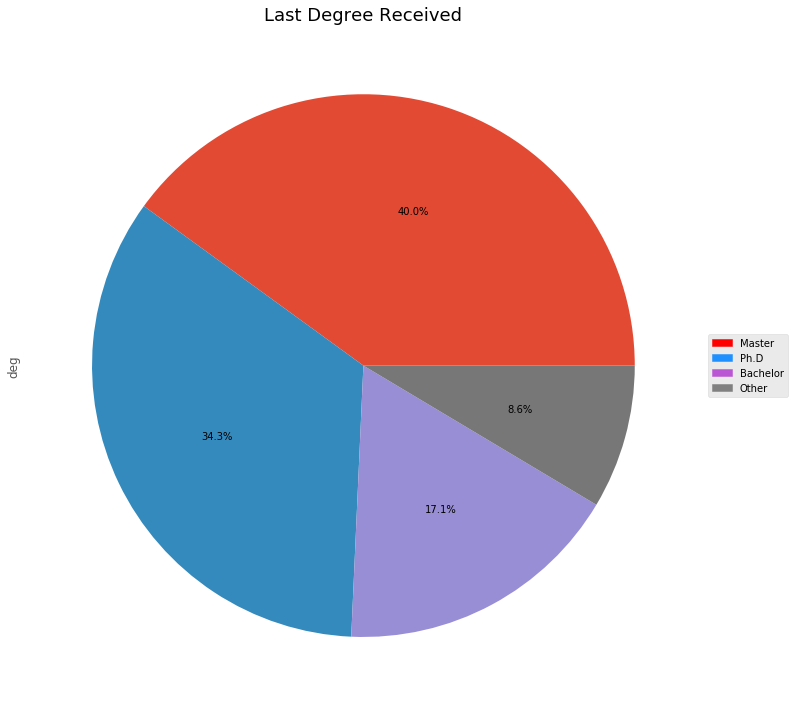

In [68]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.color'] = 'black'
plt.figure(figsize=(16,10))
pie = education['deg'].value_counts().plot(kind="pie", autopct='%1.1f%%', labels=None)

pie.set_title("Last Degree Received", fontsize=18)
Master = mpatches.Patch(color='red', label='Master')
PhD = mpatches.Patch(color='dodgerblue', label='Ph.D')
Bachelor = mpatches.Patch(color='mediumorchid', label='Bachelor')
Other = mpatches.Patch(color='gray', label='Other')
plt.legend(handles=[Master,PhD,Bachelor,Other], loc='center left', bbox_to_anchor=(1, 0.5))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.savefig('pie_degree_uber.png')

### Best coding language to know

In [3]:
# what skills are in the value?
df['skills'].unique()

NameError: name 'df' is not defined

In [10]:
df2 = df[df['skills'].notnull()]
skills = ','.join(word for word in df2['skills'])


python = (skills.count('Python')/38)*100
r = (skills.count('R')/38)*100
sql = (skills.count('SQL')/38)*100
cplus= (skills.count('C++')/38)*100
java= (skills.count('Java')/38)*100
c = (skills.count('C')/38)*100

print(python)
print(r)
print(sql)
print(cplus)
print(java)
print(c)


26.31578947368421
23.684210526315788
5.263157894736842
10.526315789473683
10.526315789473683
23.684210526315788


In [11]:
programming_skiils = {'Python' : 26.32 , 'R' : 23.68 , 'C' : 23.68 , 'C++' :10.53 , 'Java' :10.53 ,'sql' : 5.26  }
skill = pd.DataFrame(columns = ['programming_lang' , 'percent'],data =programming_skiils.items())
skill

programming_lang  percent
0           Python    26.32
1                R    23.68
2                C    23.68
3              C++    10.53
4             Java    10.53
5              sql     5.26

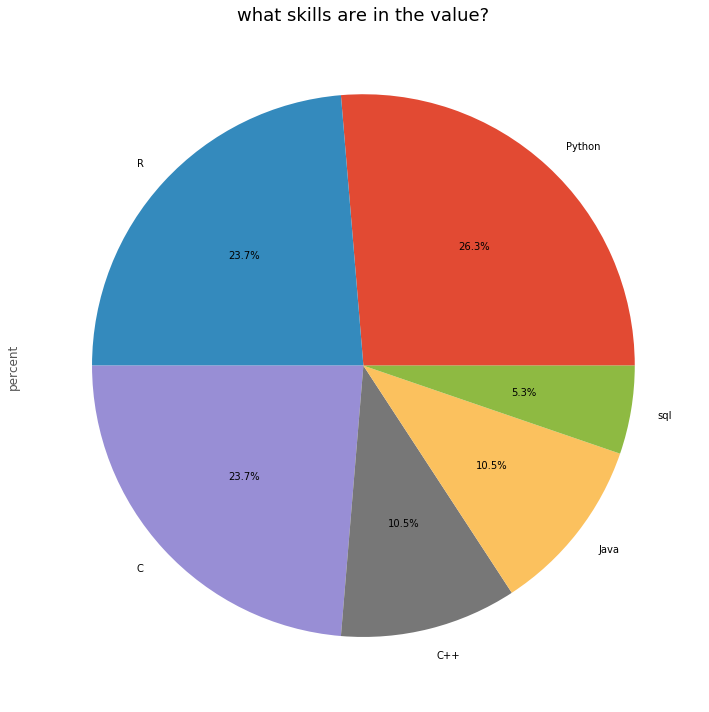

In [12]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.color'] = 'black'
plt.figure(figsize=(16,10))

pie = skill['percent'].plot(kind="pie", autopct='%1.1f%%', labels=skill['programming_lang'])

pie.set_title("what skills are in the value?", fontsize=18)
plt.tight_layout()
plt.savefig('pie_programms.png')

In [1]:
skill.set_index('programming_lang', inplace = True)
skill['percent'].plot(kind = 'bar')

NameError: name 'skill' is not defined

In [13]:
counts = dict()
for skill in skills.split(','):
    s = skill.lower()
    counts[s] = counts.get(s, 0) + 1

    
counts

{'machine learning': 19,
 'deep learning': 3,
 'statistics': 5,
 'simulations': 1,
 'matlab': 3,
 'c++': 4,
 'c': 2,
 'java': 4,
 'python': 10,
 'r': 7,
 'data analysis': 8,
 'quantitative research': 1,
 'problem solving': 1,
 'data visualization': 1,
 'data analytics': 1,
 'data science': 3,
 'design of experiments': 1,
 'sql': 2,
 'statistical data analysis': 1,
 'optimization': 1,
 'sas': 1,
 'data mining': 3,
 'hadoop': 1,
 'analysis': 1,
 'predictive modeling': 1,
 'statistical modeling': 1,
 'apache spark': 1,
 'teamwork': 1,
 'big data': 1,
 'customer service': 1,
 'microsoft excel': 1,
 'theoretical physics': 1,
 'mathematica': 1,
 'general relativity': 1,
 'php': 1,
 'software development life cycle (sdlc)': 1}

In [14]:
all_skills = pd.DataFrame(columns = ['experties' , 'count'],data =counts.items())
all_skills.sort_values('count',ascending=False,inplace=True,)
all_skills

experties  count
0                         machine learning     19
8                                   python     10
10                           data analysis      8
9                                        r      7
2                               statistics      5
5                                      c++      4
7                                     java      4
4                                   matlab      3
21                             data mining      3
1                            deep learning      3
15                            data science      3
17                                     sql      2
6                                        c      2
26                            apache spark      1
27                                teamwork      1
28                                big data      1
32                             mathematica      1
29                        customer service      1
30                         microsoft excel      1
31                     theoretical physics      1
24                     predictive modeling      1
33                      general relativity      1
34                                     php      1
25                    statistical modeling      1
18               statistical data analysis      1
23                                analysis      1
22                                  hadoop      1
20                                     sas      1
19                            optimization      1
16                   design of experiments      1
14                          data analytics      1
13                      data visualization      1
12                         problem solving      1
11                   quantitative research      1
3                              simulations      1
35  software development life cycle (sdlc)      1

In [15]:
all_skills['percent'] = (all_skills['count']/all_skills['experties'].count()) * 100

all_skills.set_index(["experties"],inplace = True) 
   
# resetting index 
# all_skills.reset_index() 
all_skills

count    percent
experties                                               
machine learning                           19  52.777778
python                                     10  27.777778
data analysis                               8  22.222222
r                                           7  19.444444
statistics                                  5  13.888889
c++                                         4  11.111111
java                                        4  11.111111
matlab                                      3   8.333333
data mining                                 3   8.333333
deep learning                               3   8.333333
data science                                3   8.333333
sql                                         2   5.555556
c                                           2   5.555556
apache spark                                1   2.777778
teamwork                                    1   2.777778
big data                                    1   2.777778
mathematica                                 1   2.777778
customer service                            1   2.777778
microsoft excel                             1   2.777778
theoretical physics                         1   2.777778
predictive modeling                         1   2.777778
general relativity                          1   2.777778
php                                         1   2.777778
statistical modeling                        1   2.777778
statistical data analysis                   1   2.777778
analysis                                    1   2.777778
hadoop                                      1   2.777778
sas                                         1   2.777778
optimization                                1   2.777778
design of experiments                       1   2.777778
data analytics                              1   2.777778
data visualization                          1   2.777778
problem solving                             1   2.777778
quantitative research                       1   2.777778
simulations                                 1   2.777778
software development life cycle (sdlc)      1   2.777778

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


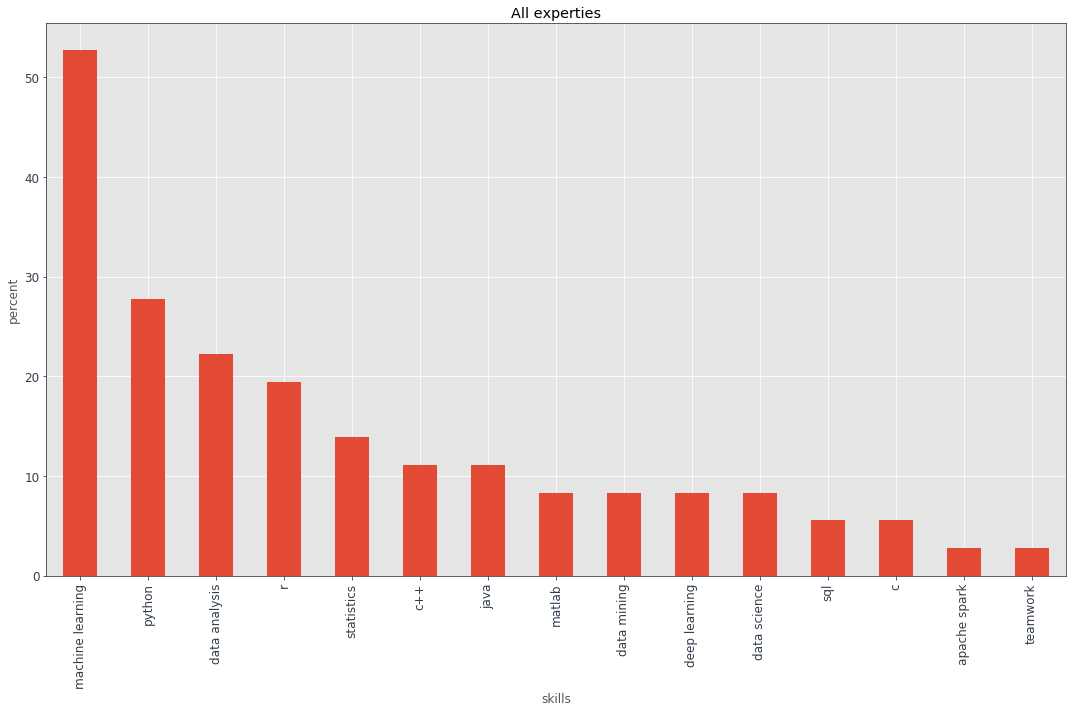

In [16]:
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['text.color'] = 'black'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

plt.figure(figsize=(16,10))

bar = all_skills['percent'].nlargest(15).plot(kind='bar', title ="All experties", figsize=(15, 10), fontsize=12)
bar.set_xlabel("skills", fontsize=12)
bar.set_ylabel("percent", fontsize=12)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.savefig('Experties_bar.png')
plt.show()
# plt.savefig('bar_skills.png')

### Job titles at Uber for Data Scienitist field

In [4]:
#Categorize job positions 

# Function to identify job titles at Uber
def uberJ(x):
    if x.lower().find('soft') != -1:
        return('Software Engineer')
    if x.lower().find('machine') != -1:
         return('Machine Learning Engineer')
    if x.lower().find('scien') != -1:
         return('Data Scientist')
    if x.lower().find('analy') != -1:
         return('Analyst')
    if x.lower().find('prod') != -1:
         return('Product')
    if x.lower().find('resea') != -1 or x.lower().find('dat') != -1 or x.lower().find('auto') != -1:
         return('Research')
    else:
        return('Other')

    
# Create starting year column
df['Job_cat'] = list(map(uberJ, df['job_title']))
df['job_title']

NameError: name 'df' is not defined

In [18]:
df['Job_cat'].unique()

array(['Data Scientist', 'Analyst', 'Machine Learning Engineer',
       'Software Engineer'], dtype=object)

In [19]:
df['Job_cat'].value_counts(normalize=True) * 100

Data Scientist               69.444444
Analyst                      16.666667
Machine Learning Engineer    11.111111
Software Engineer             2.777778
Name: Job_cat, dtype: float64

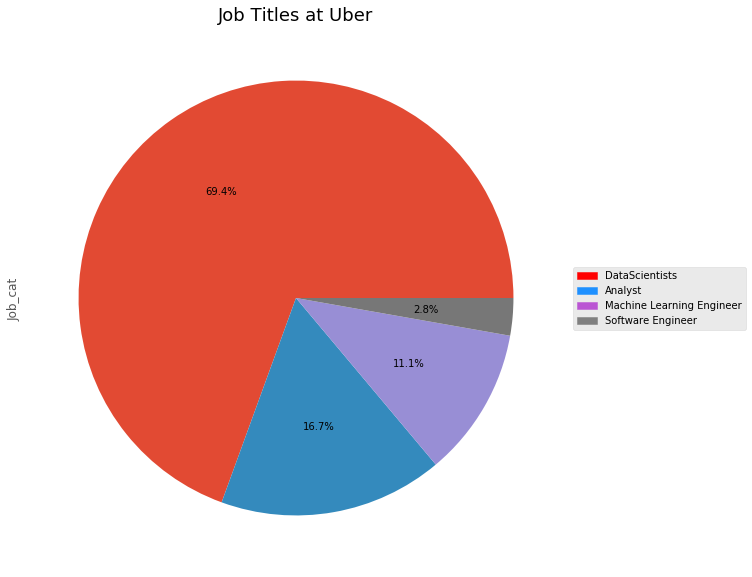

In [71]:
matplotlib.rcParams['text.color'] = 'black'
plt.figure(figsize=(16,10))
pie3 = df['Job_cat'].value_counts().plot(kind="pie", autopct='%1.1f%%', labels=None)

pie3.set_title("Job Titles at Uber", fontsize=18)

DataScientists = mpatches.Patch(color='red', label='DataScientists')
Analyst = mpatches.Patch(color='dodgerblue', label='Analyst')
Machine_Learning_Engineer  = mpatches.Patch(color='mediumorchid', label='Machine Learning Engineer')
Software_Engineer = mpatches.Patch(color='gray', label='Software Engineer')


plt.legend(handles=[DataScientists,Analyst,Machine_Learning_Engineer,Software_Engineer], loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Job Titles at Uber.png')

### Data Scientist vs. Senior Data Scientist

In [21]:
def DS(x):
    if x.lower().find('senior') != -1 or x.lower().find('sr.') != -1:
        return('Senior')
    if x.lower().find('scientist') != -1:
         return('Scientist')
    else:
        return('Other')
   
# create column for category 

df['DS'] = list(map(DS, df['job_title']))
df

name  \
0                   Payam Siyari   
1                  Afshine Amidi   
2                  Ehsan Mousavi   
3                  Soheil Ehsani   
4                  Akshay Tiwari   
5                        Ye Wang   
6                Taylor Pellerin   
7                 Shubham Sharma   
8   RahulRaghavendiran Ravikumar   
9              Abhimanyu Rathore   
10                        Wei Xu   
11                      Fei Feng   
12              Mori Ashraphijuo   
13                      Fan Yang   
14                 Nicolas Henry   
15               Xiao Cai, Ph.D.   
16                   Lily Y. Liu   
17               Daniel Chamorro   
18                     Nikhil J.   
19                Priyanka Saboo   
20                  Sai Supreeth   
21       Suman Bhattacharya, PhD   
22                       Zoey C.   
23            Pau Perng-Hwa Kung   
24          Ashirwad Chakraborty   
25                     Alex Chao   
26                   DaoYing Lin   
27              Stathis Ilonidis   
28              Divyansh Agarwal   
29                  Darwin Leung   
30                  Greg Barrett   
31               sivakumar reddy   
32                Nemanja Djuric   
33                    Jason Wien   
34                  Elizaveta G.   
35                 Gaurav Shimpi   

                                                                                              job_title  \
0                                                                         Senior Data Scientist at Uber   
1                                                                                Data Scientist at Uber   
2                                                                      Senior Data Scientist II at Uber   
3                                             PhD in computer science, working on self-driving vehicles   
4                                                                                Data Scientist at Uber   
5                                                        Senior Data Analyst, Tech Lead Manager at Uber   
6                                                                           Data Scientist at Uber Eats   
7                                                         Machine Learning and Deep Learning Enthusiast   
8                                                                         Data Scientist at Uber AdTech   
9                                               Senior Business Analyst, Analytics and Insights at Uber   
10                                                           Data Scientist at Uber, Ph.D. in Economics   
11                                                                             Data Science & Analytics   
12                                                                            Data Scientist II at Uber   
13                                                                      Data Science Manager II at Uber   
14                                                                  Data Scientist, Self-Driving @ Uber   
15                                                              Sr.Machine learning Engineering at Uber   
16                                                                                Data Scientist - Uber   
17                                                     Data Scientist specialized in Big Data Analytics   
18                                                                                       Data Scientist   
19                                                                                  Data Science @ Uber   
20  Uber | Ex-Google |Digital Marketing | Social Media Specialist | Business Development |Growth Hac...   
21                                                                         Data Science Manager at Uber   
22     Global Marketing Data Science & Analytics @UBER | CMUer | Co-Founder @TechMeetsBeauty | BeautyAI   
23                                                       Marketplace Pricing and Machine Learning @Uber   
24                  

In [22]:
DShighdeg = df[df.DS != 'Other'] 
DShighdeg

name  \
0                   Payam Siyari   
1                  Afshine Amidi   
2                  Ehsan Mousavi   
4                  Akshay Tiwari   
5                        Ye Wang   
6                Taylor Pellerin   
8   RahulRaghavendiran Ravikumar   
9              Abhimanyu Rathore   
10                        Wei Xu   
12              Mori Ashraphijuo   
14                 Nicolas Henry   
15               Xiao Cai, Ph.D.   
16                   Lily Y. Liu   
17               Daniel Chamorro   
18                     Nikhil J.   
24          Ashirwad Chakraborty   
25                     Alex Chao   
27              Stathis Ilonidis   
28              Divyansh Agarwal   
31               sivakumar reddy   
33                    Jason Wien   
34                  Elizaveta G.   
35                 Gaurav Shimpi   

                                                  job_title  \
0                             Senior Data Scientist at Uber   
1                                    Data Scientist at Uber   
2                          Senior Data Scientist II at Uber   
4                                    Data Scientist at Uber   
5            Senior Data Analyst, Tech Lead Manager at Uber   
6                               Data Scientist at Uber Eats   
8                             Data Scientist at Uber AdTech   
9   Senior Business Analyst, Analytics and Insights at Uber   
10               Data Scientist at Uber, Ph.D. in Economics   
12                                Data Scientist II at Uber   
14                      Data Scientist, Self-Driving @ Uber   
15                  Sr.Machine learning Engineering at Uber   
16                                    Data Scientist - Uber   
17         Data Scientist specialized in Big Data Analytics   
18                                           Data Scientist   
24              Software Engineer @ Uber. Ex Data Scientist   
25       Data Scientist at Uber Advanced Technologies Group   
27                            Senior Data Scientist at Uber   
28                                   Data Scientist at Uber   
31                          Senior Business Analyst at Uber   
33                                   Data Scientist at Uber   
34                                           Data Scientist   
35                 Data Scientist at INEXTURE Solutions LLP   

                       current_company  \
0                                 Uber   
1                                 Uber   
2                                 Uber   
4                                 Uber   
5                                 Uber   
6                                 Uber   
8                                 Uber   
9                                 Uber   
10                                Uber   
12                                Uber   
14                                Uber   
15                                Uber   
16                                Uber   
17                                Uber   
18                                Uber   
24                                Uber   
25   Uber Advanced Technologies Center   
27                                Uber   
28                                Uber   
31  UBER INDIA SYSTEMS PRIVATE LIMITED   
33                                Uber   
34                                Uber   
35                            UberEats   

                                     university  \
0               Georgia Institute of Technology   
1         Massachusetts Institute of Technology   
2                           Stanford University   
4                   University of San Francisco   
5                             Peking University   
6                   University of San Francisco   
8             University of Southern California   
9                                           NaN   
10         University of California, Santa Cruz   
12  Columbia University in the City of New York   
14  Columbia University in the City of New York   
15         The University of 

In [23]:
DShighdeg['DS'].value_counts(normalize=False)

Scientist    16
Senior        7
Name: DS, dtype: int64

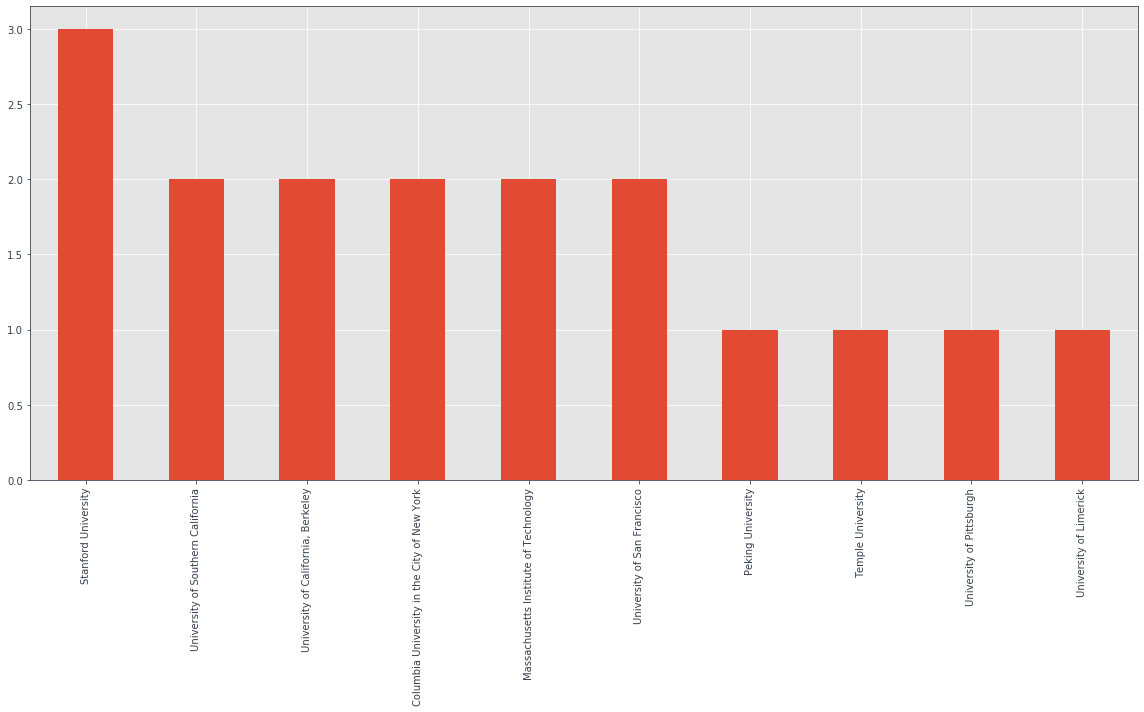

In [24]:
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('ggplot')
matplotlib.rcParams['text.color'] = 'black'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

plt.figure(figsize=(16,10))
df['university'].value_counts().nlargest(10).plot(kind = 'bar')

bar.set_xlabel("skills", fontsize=12)
bar.set_ylabel("percent", fontsize=12)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.savefig('University_bar.png')
plt.show()
# plt.savefig('bar_skills.png')

In [25]:
about_df = df[['about']].copy()
about_df

about
0                                                                                                   NaN
1                                                                                                   NaN
2                                                                                                   NaN
3   Experienced Software Engineer with a demonstrated history of working in the robotics industry as...
4   Solution-oriented Data Science professional with academic as well as industrial experience in th...
5   A data-driven problem solver with 5 years of industrial experience in advanced analytics, large ...
6                                                                                                   NaN
7                                                                                                   NaN
8   ABOUT:\r\nA unique Data Scientist with sharp analytical thinking, strong coding skills, and exce...
9   Currently working in the Analytics Centre of Excellence at Uber where I work with the Global Ana...
10  Wei has a Ph.D. in economics from the University of California, Santa Cruz. His doctoral researc...
11  Experienced data scientist with a passion for using statistics and data mining to solve complex ...
12  Developing predictive matching algorithms at Uber.\r\nWinner of:\r\n1- Silver Medal in the 2010 ...
13  Hands-on data science leader with expertise in building end-to-end machine learning / big data s...
14                                                                                                  NaN
15  I am currently a Sr. Machine learning Engineering at Uber risk team, building machine learning m...
16  Education background: mathematical and statistical modeling on programatic marketing.\r\nWorking...
17  I am a Data Scientist oriented to identify, collect and analyze data in order to provide insight...
18  • 7 years of professional experience with Data analysis and Predictive modeling using R, Python,...
19                                                                                                  NaN
20  A qualified and a result oriented Digital Marketing Fresher with experience working with a Googl...
21  I am a data scientist experienced in solving business problems using different machine learning ...
22                                                                                                  NaN
23  Uber | FeatureX (successfully exited startup) | MIT.\r\n\r\nYears of experience developing scala...
24  Backend Software Engineer with experience across the DS lifecycle: Data Eng + Modeling + Machine...
25  As a consummate data professional, I’ve successfully applied data science and machine learning a...
26  Data science leader with proven track record in generating business impact, building a world-cla...
27                                                                                                  NaN
28  Data Scientist + Software Engineer, strong at Machine Learning Engineering and Product Analytics...
29  I solve problems using data.\r\n\r\nWith a background in mathematics and statistics, my past exp...
30                                                                                                  NaN
31  Am good at Statistics, So I have passion to become data scientist.My Journey starts into Analyti...
32  Research interests: Machine Learning, Data Mining, Computational Advertising, Predictive Analyti...
33  I am a theoretical physicist turned data scientist, with experience navigating complex theoretic...
34                                                                                                  NaN
35                                                                                                  NaN

In [26]:
about_df.isna().sum()

about    12
dtype: int64

In [27]:
about_df =  about_df[about_df['about'].notna()]

In [28]:
about_df

about
3   Experienced Software Engineer with a demonstrated history of working in the robotics industry as...
4   Solution-oriented Data Science professional with academic as well as industrial experience in th...
5   A data-driven problem solver with 5 years of industrial experience in advanced analytics, large ...
8   ABOUT:\r\nA unique Data Scientist with sharp analytical thinking, strong coding skills, and exce...
9   Currently working in the Analytics Centre of Excellence at Uber where I work with the Global Ana...
10  Wei has a Ph.D. in economics from the University of California, Santa Cruz. His doctoral researc...
11  Experienced data scientist with a passion for using statistics and data mining to solve complex ...
12  Developing predictive matching algorithms at Uber.\r\nWinner of:\r\n1- Silver Medal in the 2010 ...
13  Hands-on data science leader with expertise in building end-to-end machine learning / big data s...
15  I am currently a Sr. Machine learning Engineering at Uber risk team, building machine learning m...
16  Education background: mathematical and statistical modeling on programatic marketing.\r\nWorking...
17  I am a Data Scientist oriented to identify, collect and analyze data in order to provide insight...
18  • 7 years of professional experience with Data analysis and Predictive modeling using R, Python,...
20  A qualified and a result oriented Digital Marketing Fresher with experience working with a Googl...
21  I am a data scientist experienced in solving business problems using different machine learning ...
23  Uber | FeatureX (successfully exited startup) | MIT.\r\n\r\nYears of experience developing scala...
24  Backend Software Engineer with experience across the DS lifecycle: Data Eng + Modeling + Machine...
25  As a consummate data professional, I’ve successfully applied data science and machine learning a...
26  Data science leader with proven track record in generating business impact, building a world-cla...
28  Data Scientist + Software Engineer, strong at Machine Learning Engineering and Product Analytics...
29  I solve problems using data.\r\n\r\nWith a background in mathematics and statistics, my past exp...
31  Am good at Statistics, So I have passion to become data scientist.My Journey starts into Analyti...
32  Research interests: Machine Learning, Data Mining, Computational Advertising, Predictive Analyti...
33  I am a theoretical physicist turned data scientist, with experience navigating complex theoretic...

In [29]:
import string
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    text = re.sub(r'[^a-zA-Z0-9 \n\.]', ' ' , text)
    text = text.replace('\n', ' ')
    return text

about_df['about_punct'] = about_df["about"].apply(lambda x: remove_punct(x))
about_df.head(10)

C:\Users\behdad\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


about  \
3   Experienced Software Engineer with a demonstrated history of working in the robotics industry as...   
4   Solution-oriented Data Science professional with academic as well as industrial experience in th...   
5   A data-driven problem solver with 5 years of industrial experience in advanced analytics, large ...   
8   ABOUT:\r\nA unique Data Scientist with sharp analytical thinking, strong coding skills, and exce...   
9   Currently working in the Analytics Centre of Excellence at Uber where I work with the Global Ana...   
10  Wei has a Ph.D. in economics from the University of California, Santa Cruz. His doctoral researc...   
11  Experienced data scientist with a passion for using statistics and data mining to solve complex ...   
12  Developing predictive matching algorithms at Uber.\r\nWinner of:\r\n1- Silver Medal in the 2010 ...   
13  Hands-on data science leader with expertise in building end-to-end machine learning / big data s...   
15  I am currently a Sr. Machine learning Engineering at Uber risk team, building machine learning m...   

                                                                                            about_punct  
3   Experienced Software Engineer with a demonstrated history of working in the robotics industry as...  
4   Solutionoriented Data Science professional with academic as well as industrial experience in the...  
5   A datadriven problem solver with  years of industrial experience in advanced analytics large sca...  
8   ABOUT  A unique Data Scientist with sharp analytical thinking strong coding skills and excellent...  
9   Currently working in the Analytics Centre of Excellence at Uber where I work with the Global Ana...  
10  Wei has a PhD in economics from the University of California Santa Cruz His doctoral research ex...  
11  Experienced data scientist with a passion for using statistics and data mining to solve complex ...  
12  Developing predictive matching algorithms at Uber  Winner of   Silver Medal in the  Internationa...  
13  Handson data science leader with expertise in building endtoend machine learning  big data solut...  
15  I am currently a Sr Machine learning Engineering at Uber risk team building machine learning mod...

In [30]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

about_df['about_tokenized'] = about_df['about_punct'] .apply(lambda x: tokenization(x.lower()))
about_df.head()

C:\Users\behdad\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


about  \
3  Experienced Software Engineer with a demonstrated history of working in the robotics industry as...   
4  Solution-oriented Data Science professional with academic as well as industrial experience in th...   
5  A data-driven problem solver with 5 years of industrial experience in advanced analytics, large ...   
8  ABOUT:\r\nA unique Data Scientist with sharp analytical thinking, strong coding skills, and exce...   
9  Currently working in the Analytics Centre of Excellence at Uber where I work with the Global Ana...   

                                                                                           about_punct  \
3  Experienced Software Engineer with a demonstrated history of working in the robotics industry as...   
4  Solutionoriented Data Science professional with academic as well as industrial experience in the...   
5  A datadriven problem solver with  years of industrial experience in advanced analytics large sca...   
8  ABOUT  A unique Data Scientist with sharp analytical thinking strong coding skills and excellent...   
9  Currently working in the Analytics Centre of Excellence at Uber where I work with the Global Ana...   

                                                                                       about_tokenized  
3  [experienced, software, engineer, with, a, demonstrated, history, of, working, in, the, robotics...  
4  [solutionoriented, data, science, professional, with, academic, as, well, as, industrial, experi...  
5  [a, datadriven, problem, solver, with, years, of, industrial, experience, in, advanced, analytic...  
8  [about, a, unique, data, scientist, with, sharp, analytical, thinking, strong, coding, skills, a...  
9  [currently, working, in, the, analytics, centre, of, excellence, at, uber, where, i, work, with,...

In [31]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
about_df['about_nonstop'] = about_df['about_tokenized'].apply(lambda x: remove_stopwords(x))
about_df.head(10)

C:\Users\behdad\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


about  \
3   Experienced Software Engineer with a demonstrated history of working in the robotics industry as...   
4   Solution-oriented Data Science professional with academic as well as industrial experience in th...   
5   A data-driven problem solver with 5 years of industrial experience in advanced analytics, large ...   
8   ABOUT:\r\nA unique Data Scientist with sharp analytical thinking, strong coding skills, and exce...   
9   Currently working in the Analytics Centre of Excellence at Uber where I work with the Global Ana...   
10  Wei has a Ph.D. in economics from the University of California, Santa Cruz. His doctoral researc...   
11  Experienced data scientist with a passion for using statistics and data mining to solve complex ...   
12  Developing predictive matching algorithms at Uber.\r\nWinner of:\r\n1- Silver Medal in the 2010 ...   
13  Hands-on data science leader with expertise in building end-to-end machine learning / big data s...   
15  I am currently a Sr. Machine learning Engineering at Uber risk team, building machine learning m...   

                                                                                            about_punct  \
3   Experienced Software Engineer with a demonstrated history of working in the robotics industry as...   
4   Solutionoriented Data Science professional with academic as well as industrial experience in the...   
5   A datadriven problem solver with  years of industrial experience in advanced analytics large sca...   
8   ABOUT  A unique Data Scientist with sharp analytical thinking strong coding skills and excellent...   
9   Currently working in the Analytics Centre of Excellence at Uber where I work with the Global Ana...   
10  Wei has a PhD in economics from the University of California Santa Cruz His doctoral research ex...   
11  Experienced data scientist with a passion for using statistics and data mining to solve complex ...   
12  Developing predictive matching algorithms at Uber  Winner of   Silver Medal in the  Internationa...   
13  Handson data science leader with expertise in building endtoend machine learning  big data solut...   
15  I am currently a Sr Machine learning Engineering at Uber risk team building machine learning mod...   

                                                                                        about_tokenized  \
3   [experienced, software, engineer, with, a, demonstrated, history, of, working, in, the, robotics...   
4   [solutionoriented, data, science, professional, with, academic, as, well, as, industrial, experi...   
5   [a, datadriven, problem, solver, with, years, of, industrial, experience, in, advanced, analytic...   
8   [about, a, unique, data, scientist, with, sharp, analytical, thinking, strong, coding, skills, a...   
9   [currently, working, in, the, analytics, centre, of, excellence, at, uber, where, i, work, with,...   
10  [wei, has, a, phd, in, economics, from, the, university, of, california, santa, cruz, his, docto...   
11  [experienced, data, scientist, with, a, passion, for, using, statistics, and, data, mining, to, ...   
12  [developing, predictive, matching, algorithms, at, uber, winner, of, silver, medal, in, the, int...   
13  [handson, data, science, leader, with, expertise, in, building, endtoend, machine, learning, big...   
15  [i, am, currently, a, sr, machine, learning, engineering, at, uber, risk, team, building, machin...   

                                                                                          about_nonstop  
3   [experienced, software, engineer, demonstrated, history, working, robotics, industry, well, inte...  
4   [solutionoriented, data, science, professional, academic, well, industrial, experience, entire, ...  
5   [datadriven, problem, solver, years, industrial, experience, advanced, analytics, large, scale, ...  
8   [unique, data, scientist, sharp, analytical, thinking, strong, coding, skills, excellent, busine...  
9   [currently, working, analytics

In [32]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

about_df['about_stemmed'] =about_df['about_nonstop'] .apply(lambda x: stemming(x))
about_df.head()

C:\Users\behdad\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


about  \
3  Experienced Software Engineer with a demonstrated history of working in the robotics industry as...   
4  Solution-oriented Data Science professional with academic as well as industrial experience in th...   
5  A data-driven problem solver with 5 years of industrial experience in advanced analytics, large ...   
8  ABOUT:\r\nA unique Data Scientist with sharp analytical thinking, strong coding skills, and exce...   
9  Currently working in the Analytics Centre of Excellence at Uber where I work with the Global Ana...   

                                                                                           about_punct  \
3  Experienced Software Engineer with a demonstrated history of working in the robotics industry as...   
4  Solutionoriented Data Science professional with academic as well as industrial experience in the...   
5  A datadriven problem solver with  years of industrial experience in advanced analytics large sca...   
8  ABOUT  A unique Data Scientist with sharp analytical thinking strong coding skills and excellent...   
9  Currently working in the Analytics Centre of Excellence at Uber where I work with the Global Ana...   

                                                                                       about_tokenized  \
3  [experienced, software, engineer, with, a, demonstrated, history, of, working, in, the, robotics...   
4  [solutionoriented, data, science, professional, with, academic, as, well, as, industrial, experi...   
5  [a, datadriven, problem, solver, with, years, of, industrial, experience, in, advanced, analytic...   
8  [about, a, unique, data, scientist, with, sharp, analytical, thinking, strong, coding, skills, a...   
9  [currently, working, in, the, analytics, centre, of, excellence, at, uber, where, i, work, with,...   

                                                                                         about_nonstop  \
3  [experienced, software, engineer, demonstrated, history, working, robotics, industry, well, inte...   
4  [solutionoriented, data, science, professional, academic, well, industrial, experience, entire, ...   
5  [datadriven, problem, solver, years, industrial, experience, advanced, analytics, large, scale, ...   
8  [unique, data, scientist, sharp, analytical, thinking, strong, coding, skills, excellent, busine...   
9  [currently, working, analytics, centre, excellence, uber, work, global, analytics, insights, tea...   

                                                                                         about_stemmed  
3  [experienc, softwar, engin, demonstr, histori, work, robot, industri, well, internet, industri, ...  
4  [solutionori, data, scienc, profession, academ, well, industri, experi, entir, pipelin, data, sc...  
5  [datadriven, problem, solver, year, industri, experi, advanc, analyt, larg, scale, dataset, appl...  
8  [uniqu, data, scientist, sharp, analyt, think, strong, code, skill, excel, busi, acumen, deriv, ...  
9  [current, work, analyt, centr, excel, uber, work, global, analyt, insight, team, background, com...

In [33]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

about_df['about_lemmatized'] = about_df['about_stemmed'].apply(lambda x: lemmatizer(x))
about_df.head()

C:\Users\behdad\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


about  \
3  Experienced Software Engineer with a demonstrated history of working in the robotics industry as...   
4  Solution-oriented Data Science professional with academic as well as industrial experience in th...   
5  A data-driven problem solver with 5 years of industrial experience in advanced analytics, large ...   
8  ABOUT:\r\nA unique Data Scientist with sharp analytical thinking, strong coding skills, and exce...   
9  Currently working in the Analytics Centre of Excellence at Uber where I work with the Global Ana...   

                                                                                           about_punct  \
3  Experienced Software Engineer with a demonstrated history of working in the robotics industry as...   
4  Solutionoriented Data Science professional with academic as well as industrial experience in the...   
5  A datadriven problem solver with  years of industrial experience in advanced analytics large sca...   
8  ABOUT  A unique Data Scientist with sharp analytical thinking strong coding skills and excellent...   
9  Currently working in the Analytics Centre of Excellence at Uber where I work with the Global Ana...   

                                                                                       about_tokenized  \
3  [experienced, software, engineer, with, a, demonstrated, history, of, working, in, the, robotics...   
4  [solutionoriented, data, science, professional, with, academic, as, well, as, industrial, experi...   
5  [a, datadriven, problem, solver, with, years, of, industrial, experience, in, advanced, analytic...   
8  [about, a, unique, data, scientist, with, sharp, analytical, thinking, strong, coding, skills, a...   
9  [currently, working, in, the, analytics, centre, of, excellence, at, uber, where, i, work, with,...   

                                                                                         about_nonstop  \
3  [experienced, software, engineer, demonstrated, history, working, robotics, industry, well, inte...   
4  [solutionoriented, data, science, professional, academic, well, industrial, experience, entire, ...   
5  [datadriven, problem, solver, years, industrial, experience, advanced, analytics, large, scale, ...   
8  [unique, data, scientist, sharp, analytical, thinking, strong, coding, skills, excellent, busine...   
9  [currently, working, analytics, centre, excellence, uber, work, global, analytics, insights, tea...   

                                                                                         about_stemmed  \
3  [experienc, softwar, engin, demonstr, histori, work, robot, industri, well, internet, industri, ...   
4  [solutionori, data, scienc, profession, academ, well, industri, experi, entir, pipelin, data, sc...   
5  [datadriven, problem, solver, year, industri, experi, advanc, analyt, larg, scale, dataset, appl...   
8  [uniqu, data, scientist, sharp, analyt, think, strong, code, skill, excel, busi, acumen, deriv, ...   
9  [current, work, analyt, centr, excel, uber, work, global, analyt, insight, team, background, com...   

                                                                                      about_lemmatized  
3  [experienc, softwar, engin, demonstr, histori, work, robot, industri, well, internet, industri, ...  
4  [solutionori, data, scienc, profession, academ, well, industri, experi, entir, pipelin, data, sc...  
5  [datadriven, problem, solver, year, industri, experi, advanc, analyt, larg, scale, dataset, appl...  
8  [uniqu, data, scientist, sharp, analyt, think, strong, code, skill, excel, busi, acumen, deriv, ...  
9  [current, work, analyt, centr, excel, uber, work, global, analyt, insight, team, background, com...

In [34]:
from nltk.tokenize import word_tokenize

# Uncomment this line if you haven't downloaded punkt before
# or just run it as it is and uncomment it if you got an error.
# nltk.download('punkt')

def most_used_words(text):
    tokens = word_tokenize(text)
    frequency_dist = nltk.FreqDist(tokens)
    print("There is %d different words" % len(set(text)))
    return sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)

In [35]:
words = set(nltk.corpus.words.words())

test_text_data = " ".join(w for w in nltk.wordpunct_tokenize(about_df.about.str.cat()) \
         if w.lower() in words or not w.isalpha())


In [36]:
most_used_words(test_text_data)[:10]

There is 87 different words


[',', '.', 'and', '-', 'in', ':', 'of', 'data', 'a', 'the']

In [37]:
mw = most_used_words(about_df.about.str.cat())
most_words = []
for w in mw:
    if len(most_words) == 1000:
        break
    if w in stopwords.words("english"):
        continue
    else:
        most_words.append(w)

There is 90 different words


In [38]:
sorted(most_words)

['!',
 '#',
 '&',
 "'m",
 "'re",
 "'s",
 '(',
 ')',
 '************************',
 '+',
 ',',
 '-',
 '--',
 '.',
 '/',
 '//scholar.google.com/citations',
 '//www.columbia.edu/~ma3429/',
 '1-',
 '1.5',
 '10',
 '10+',
 '15+',
 '2-',
 '20+',
 '2000',
 '2003',
 '2008',
 '2009',
 '2010',
 '2013',
 '2016',
 '3',
 '3-',
 '4',
 '4-',
 '5',
 '5+',
 '5-',
 '7',
 ':',
 ';',
 '>',
 '?',
 '@',
 'A',
 'A/B',
 'AI',
 'AMPL',
 'ANN',
 'APIs',
 'AWS',
 'Abbott',
 'Acquisition',
 'Additionally',
 'Alexa',
 'Alg',
 'Algorithm',
 'Algorithms',
 'All',
 'Also',
 'Analysis',
 'Analyst',
 'Analytics',
 'Apache',
 'Apart',
 'Architecture',
 'Area',
 'Arlington',
 'Artificial',
 'Assistant',
 'Astrophysics',
 'AutoCAD',
 'Automation',
 'Automotive',
 'BACKGROUND',
 'BI',
 'BS',
 'Backend',
 'Bandit',
 'Banking',
 'Bay',
 'Bayes',
 'Before',
 'Berkeley',
 'Best',
 'Big',
 'BigQuery',
 'Bigquery',
 'Boosting',
 'Bootcamp',
 'Bronze',
 'Business',
 'C++',
 'C/C++',
 'CENTRIST',
 'CI',
 'CNN',
 'COMPETENCIES',
 'CO

In [39]:
# I'm defining this function to use it in the 
# Data Preparation Phase
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

# nltk.download('wordnet')
def stem_tokenize(text):
    stemmer = SnowballStemmer("english")
    stemmer = WordNetLemmatizer()
    return [stemmer.lemmatize(token) for token in word_tokenize(text)]

def lemmatize_tokenize(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in word_tokenize(text)]

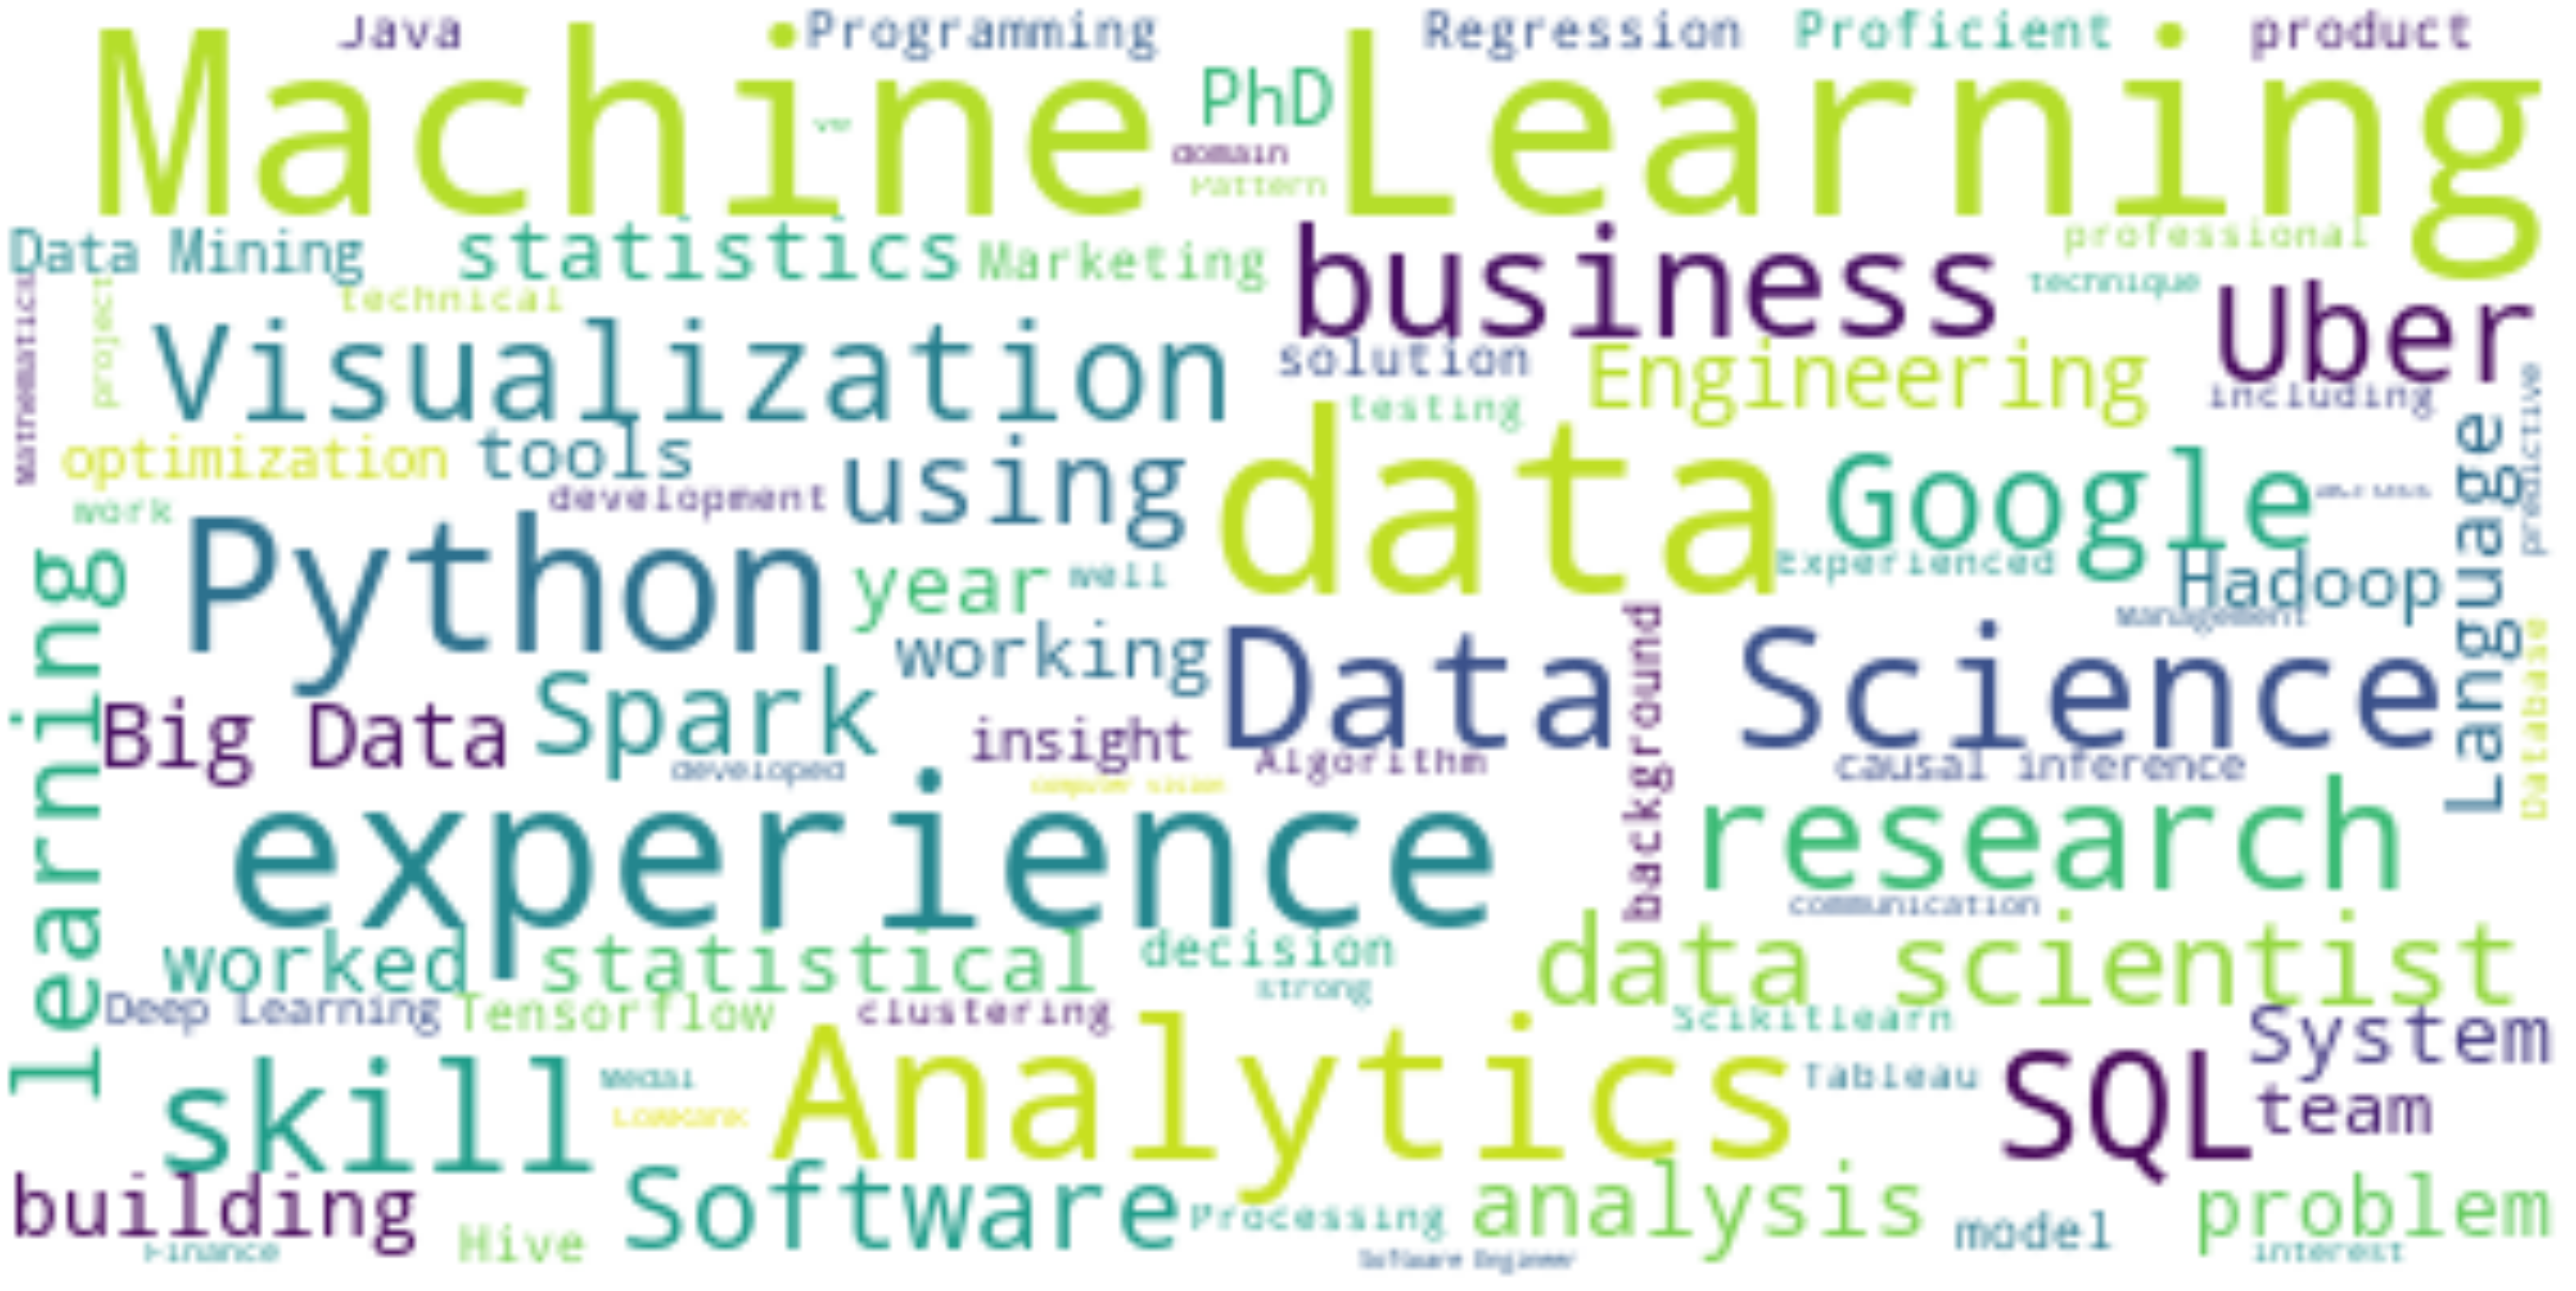

In [40]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
# Start with one review:
text = " ".join(about for about in about_df.about_punct)
# lower max_font_size, change the maximum number of word and lighten the background:
stopwords = set(STOPWORDS)
# stopwords.add(search_modifier)
wordcloud = WordCloud(max_font_size=50, max_words=100,stopwords= stopwords ,  background_color="white").generate(text)
wordcloud.to_file('wordcloud_Uber.png')
plt.figure(figsize=(100,50))
plt.tight_layout()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## Frequency Analysis

In [41]:
#download nltk attribute if needed
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('reuters')

[nltk_data] Downloading package reuters to C:\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [42]:
text = ' '.join(description for description in about_df.about_punct)

In [43]:
text

'Experienced Software Engineer with a demonstrated history of working in the robotics industry as well as the internet industry Skilled in Software Architecture and Algorithm Design Machine Learning C Python and Java Has a PhD in Computer Science with focus on Combinatorial Optimizations and Online Decision Making see publications httpsscholargooglecomcitationsuserqbImgYAAAAJhlen Solutionoriented Data Science professional with academic as well as industrial experience in the entire pipeline of data science projects including Data Acquisition Machine Learning Data Visualization and AB testing    My experience heavily involves munging data building  validating Machine Learning models using scikitlearn pandas  numpy on Python and building ETL pipelines using SQL on PostgreSQL  Google Bigquery I have also worked on computer vision projects such as face recognition and age detection using Keras and openCV    Apart from the technical expertise my ability to quickly put together a solution an

In [44]:
# tokenization
filtered_text = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

In [45]:
from nltk.corpus import stopwords
# stopwords
filtered_text = [word for word in filtered_text if word not in stopwords.words('english')]

In [46]:
# punctuation
filtered_text = [''.join(c for c in s if c not in string.punctuation) for s in filtered_text]
filtered_text = [s for s in filtered_text if s]

In [47]:
# lowercase
filtered_text = [word.lower() for word in filtered_text]

In [48]:
# Word Stemming
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
filtered_text_stem = [stemmer.stem(t) for t in filtered_text]

In [49]:
# Lemmatization
lemmatizer = nltk.WordNetLemmatizer()

filtered_text_lem = [lemmatizer.lemmatize(t) for t in filtered_text]

In [50]:
# NLTK Frequency Distributions
#nltkText = [filtered_text_stem, filtered_text_lem]

fdist = nltk.FreqDist(filtered_text_lem)

fdistDF = pd.DataFrame.from_dict(fdist, orient='index').reset_index()
fdistDF = fdistDF.rename(columns={'index':'word', 0:'count'})
fdistDF = fdistDF.sort_values(by='count', ascending=False)
print('-----------------head words-----------------')
print(fdistDF.head(10).reset_index(drop=True))
print('-----------------tail words-----------------')
print(fdistDF.tail(10).reset_index(drop=True))

-----------------head words-----------------
         word  count
0        data     69
1    learning     47
2           i     35
3     machine     35
4  experience     22
5   analytics     18
6      python     17
7     science     17
8       skill     12
9    business     12
-----------------tail words-----------------
              word  count
0            power      1
1             this      1
2        nonconvex      1
3              aim      1
4       relaxation      1
5          recover      1
6       nearglobal      1
7  highdimensional      1
8         calculus      1
9       restaurant      1
